In [2]:
%matplotlib inline

import sys
import os
import numpy as np
import pandas as pd
import xarray as xr
from math import ceil,sin,cos, atan2, pi, sqrt
import matplotlib
from matplotlib import pyplot as plt, animation, rc,colors
from datetime import datetime, timedelta
from cartopy import crs, feature
import cmocean
import yaml

from IPython.display import Image
rc('animation', html='html5')

sys.path.append('/home/jvalenti/MOAD/analysis-jose/Source')
from OP_functions23 import *

In [3]:
path_bat = '/home/jvalenti/MOAD/grid/bathymetry_202108.nc'
bat = xr.open_dataset(path_bat,decode_times=False).Bathymetry

In [9]:
xr.open_dataset(path_area,decode_times=False)

<xarray.Dataset>
Dimensions:               (y: 898, x: 398, nvertex: 4, deptht: 40,
                           axis_nbounds: 2, time_counter: 24)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
  * deptht                (deptht) float32 0.5 1.5 2.5 3.5 ... 387.6 414.5 441.5
    time_centered         (time_counter) float64 ...
  * time_counter          (time_counter) float64 3.876e+09 ... 3.876e+09
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_lon            (y, x, nvertex) float32 ...
    bounds_lat            (y, x, nvertex) float32 ...
    area                  (y, x) float32 ...
    deptht_bounds         (deptht, axis_nbounds) float32 ...
    sossheig              (time_counter, y, x) float32 ...
    time_centered_bounds  (time_counter, axis_nbounds) float64 ...
    time_counter_bounds   (time_counter, axis_nbounds) float64 ...
    votemper              (time_counter, deptht, y, x) float32 ...
    vosaline              (time_counter, deptht, y, x) float32 ...
    sigma_theta           (time_counter, deptht, y, x) float32 ...
    e3t                   (time_counter, deptht, y, x) float32 ...
Attributes:
    name:         SalishSea_1h_20221026_20221031
    description:  physics tracers and VVL layer thicknesses
    title:        physics tracers and VVL layer thicknesses
    Conventions:  CF-1.6
    timeStamp:    2022-Dec-26 16:14:29 GMT
    uuid:         fadd50d2-7d9a-4969-b460-fa820bb8a66e

In [20]:
path_d='/results2/SalishSea/nowcast-green.202111/31oct22/SalishSea_1h_20221031_20221031_grid_T.nc'
path_area='/results2/SalishSea/nowcast-green.202111/31oct22/SalishSea_1h_20221031_20221031_grid_T.nc'
path_area='/results2/SalishSea/nowcast-green.202111/31oct22/SalishSea_1h_20221031_20221031_grid_T.nc'
path_mask = '/ocean/jvalenti/MOAD/grid2/mesh_mask202108_TDV.nc'
e3t = xr.open_dataset(path_d,decode_times=False).e3t
Area = xr.open_dataset(path_area,decode_times=False).area
mbathy = xr.open_dataset(path_mask,decode_times=False).mbathy
zz_ww = xr.open_dataset(path_mask,decode_times=False).gdepw_0

In [23]:
xr.open_dataset(path_mask,decode_times=False)

<xarray.Dataset>
Dimensions:       (y: 898, x: 398, z: 40, t: 1)
Dimensions without coordinates: y, x, z, t
Data variables: (12/46)
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    tmask         (t, z, y, x) int8 ...
    umask         (t, z, y, x) int8 ...
    ...            ...
    gdept_1d      (t, z) float64 ...
    gdepw_1d      (t, z) float64 ...
    e3t_1d        (t, z) float64 ...
    e3w_1d        (t, z) float64 ...
    totaldepth    (y, x) float32 ...
    volume        (z, y, x) int64 ...
Attributes:
    file_name:  mesh_mask.nc
    TimeStamp:  07/08/2021 17:25:49 -0700

In [156]:
def profdif(t):
    i = 300
    j = 299
    kmax = int(mbathy[0,i,j].item())
    dA = np.cumsum(e3t[t,:kmax,i,j])
    dC = np.cumsum(e3t0[0,:kmax,i,j])
    i = 300
    j = 300
    kmax = int(mbathy[0,i,j].item())
    dB = np.cumsum(e3t[t,:kmax,i,j])
    return dA,dB,dC
def ploting(t):
    dA,dB,dC = profdif(t)
    for i in range(len(dA)):
        plt.axhline(y=-dA[i],xmin=-1,xmax=0.5)
    for i in range(len(dB)):
        plt.axhline(y=-dB[i],xmin=0.5,xmax=1)
    for i in range(len(dC)):
        plt.axhline(y=-dC[i],c='r',alpha = 0.2)
    plt.fill_between(np.linspace(0,0.5,len(dA)), -np.ones(len(dA))*float(dA[-1]),-np.ones(len(dA))*float(dA[-1])-5, color='brown',zorder=5,alpha = 0.3) 
    plt.fill_between(np.linspace(0.5,1,len(dB)), -np.ones(len(dB))*float(dB[-1]),-np.ones(len(dB))*float(dB[-1])-15, color='brown',zorder=5,alpha = 0.3)  
    plt.xlim([0,1])
    plt.ylim([-28,0])


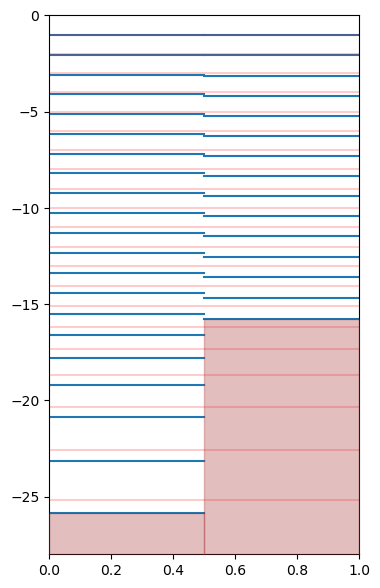

In [173]:
fig = plt.figure(figsize=(4,7))
def update(frame):
        fr = round(frame)
        plt.clf()
        ploting(fr)
anim = animation.FuncAnimation(fig, update, frames=np.arange(0,23,1))
f2 = r"/home/jvalenti/MOAD/animations/anim.gif" 
FFwriter = animation.FFMpegWriter()
anim.save(f2, writer = FFwriter)

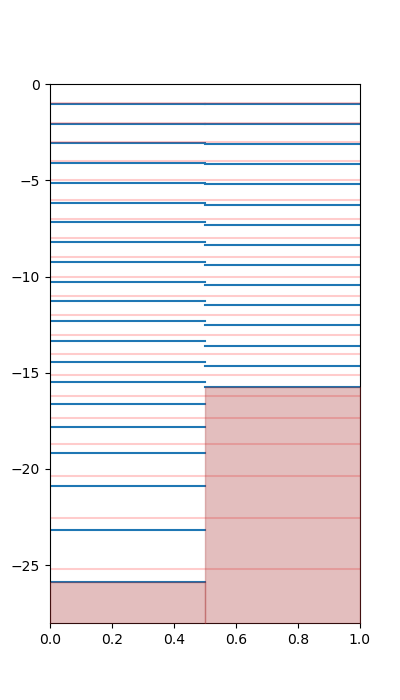

In [174]:
with open(f2,'rb') as anim:
     display(Image(anim.read()))

In [6]:
mask = xr.open_dataset(path_mask,decode_times=False)

In [11]:
mask

<xarray.Dataset>
Dimensions:       (y: 898, x: 398, z: 40, t: 1)
Dimensions without coordinates: y, x, z, t
Data variables: (12/45)
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 0.5 1.5 2.5 3.5 4.5 ... 360.7 387.6 414.5 441.5
    time_counter  (t) float64 0.0
    tmask         (t, z, y, x) int8 ...
    umask         (t, z, y, x) int8 ...
    ...            ...
    gdepw_0       (t, z, y, x) float32 ...
    gdept_1d      (t, z) float64 0.5 1.5 2.5 3.5 4.5 ... 360.7 387.6 414.5 441.5
    gdepw_1d      (t, z) float64 0.0 1.0 2.0 3.0 4.0 ... 347.2 374.1 401.1 428.0
    e3t_1d        (t, z) float64 1.0 1.0 1.0 1.0 1.0 ... 26.93 26.93 26.93 26.93
    e3w_1d        (t, z) float64 1.0 1.0 1.0 1.0 1.0 ... 26.92 26.93 26.93 26.93
    totaldepth    (y, x) float32 ...
Attributes:
    file_name:  mesh_mask.nc
    TimeStamp:  07/08/2021 17:25:49 -0700

In [76]:
dimx = zz_ww.shape[3]
dimy = zz_ww.shape[2]
totaldepth = np.zeros_like(mbathy[0,:,:],dtype='float32')

for jj in range(dimy):
    totaldepth[jj, :] = zz_ww[0, mbathy[0,jj, :],jj, :]

In [15]:
dimx = Area.shape[1]
dimy = Area.shape[0]
Volume = np.zeros_like(mask.tmask[0,:,:,:],dtype='int')

for ii in range(dimy):
    for jj in range(dimx):
        Volume[:,ii,jj] = Area[ii,jj]*e3t0[0,:,ii,jj]

In [16]:
mask['volume'] = (['z','y','x'],Volume)

In [77]:
mask['totaldepth'] = (['y','x'],totaldepth)

In [17]:
mask

<xarray.Dataset>
Dimensions:       (y: 898, x: 398, z: 40, t: 1)
Dimensions without coordinates: y, x, z, t
Data variables: (12/46)
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 0.5 1.5 2.5 3.5 4.5 ... 360.7 387.6 414.5 441.5
    time_counter  (t) float64 0.0
    tmask         (t, z, y, x) int8 ...
    umask         (t, z, y, x) int8 ...
    ...            ...
    gdept_1d      (t, z) float64 0.5 1.5 2.5 3.5 4.5 ... 360.7 387.6 414.5 441.5
    gdepw_1d      (t, z) float64 0.0 1.0 2.0 3.0 4.0 ... 347.2 374.1 401.1 428.0
    e3t_1d        (t, z) float64 1.0 1.0 1.0 1.0 1.0 ... 26.93 26.93 26.93 26.93
    e3w_1d        (t, z) float64 1.0 1.0 1.0 1.0 1.0 ... 26.92 26.93 26.93 26.93
    totaldepth    (y, x) float32 ...
    volume        (z, y, x) int64 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
Attributes:
    file_name:  mesh_mask.nc
    TimeStamp:  07/08/2021 17:25:49 -0700

In [72]:
Dat=xr.open_dataset(path(0)['coords'],decode_times=False)
outf_lat=Dat['nav_lat'][445,304]
outf_lon=Dat['nav_lon'][445,304]
clon, clat = [float(outf_lon)],[float(outf_lat)]

In [19]:
mask.to_netcdf('/ocean/jvalenti/MOAD/grid2/mesh_mask202108_TDV.nc')

In [3]:
ee3 = np.array(e3t[:,:,445,304])

In [4]:
eM = ee3[0,:]
em = ee3[10,:]
EM = np.cumsum(eM)
Em = np.cumsum(em)
eeM,eem = [EM[0]/2],[Em[0]/2]
for k in range(1,len(eM)):
    eeM.append(EM[k-1] + (EM[k]-EM[k-1])/2)
    eem.append(Em[k-1] + (Em[k]-Em[k-1])/2)
    

In [5]:
# Define paths
local = 0 #Set to 0 when working on server
paths = path(local)
config='/home/jvalenti/MOAD/analysis-jose/OParcels/neutral_iona.yaml'

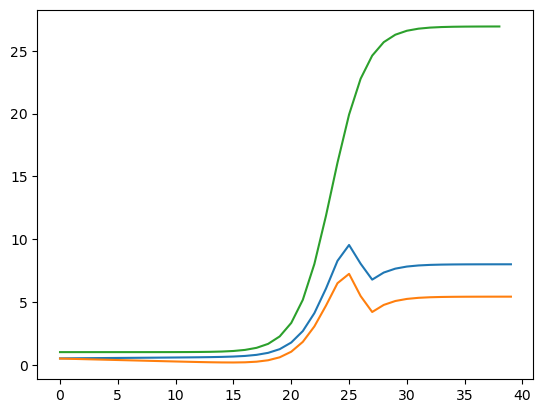

In [6]:
z = np.array(xr.open_dataset('/results2/SalishSea/nowcast-green.201905/31oct22/SalishSea_1h_20221031_20221031_grid_W.nc',decode_times=False).depthw)
plt.plot(-z+np.array(eeM))
plt.plot(-z+np.array(eem))
plt.plot(np.diff(z))
#plt.plot(-np.array(eeM))
#plt.plot(-np.array(eem))

In [37]:
param = load_config1(config)
start = datetime(param['startdate']['year'], param['startdate']['month'], param['startdate']['day']) #Start date
Tmax = param['param']['length'] # Set Time length [days] 
duration = timedelta(days=Tmax)
dt = param['param']['dt'] #toggle between - or + to pick backwards or forwards 
N = param['param']['N'] # number of deploying locations
n = param['param']['n'] # 1000   # number of particles per location
dmin = param['param']['dmin'] #minimum depth
dd = param['param']['dd'] #max depth difference from dmin
name = param['file']['name'] #name output file

daterange = [start+timedelta(days=i) for i in range(Tmax)]
fn =  name + '_'.join(d.strftime('%Y%m%d')+'_1n' for d in [start, start+duration]) + '.nc'
outfile = os.path.join(paths['out'], fn)

In [58]:
def paths_vol (start,duration,dt):
    Arealist = []
    e3tlist = []
    for day in range(duration.days):
            path_NEMO = make_prefix(start + timedelta(days=day), paths['NEMO'])
            Arealist.append(path_NEMO + '_grid_T.nc')
            e3tlist.append(path_NEMO + '_carp_T.nc')
    return Arealist, e3tlist
Arealist, e3tlist = paths_vol (start,duration,dt)


In [40]:
def paths_vol (start,duration):
    Arealist = []
    e3tlist = []
    for day in range(duration.days):
            path_NEMO = make_prefix(start + timedelta(days=day), paths['NEMO'])
            Arealist.append(path_NEMO + '_grid_T.nc')
            e3tlist.append(path_NEMO + '_carp_T.nc')
    return Arealist, e3tlist
Arealist, e3tlist = paths_vol (start,duration)


In [55]:
# def Volume_cells(start,dt):
#     opsdir, namfmt, jlims, ilims = getWindVars(start)
#     flist=et.index_model_files(start,start+DeltaT,opsdir,namfmt,
#                             flen=1,ftype='None',tres=24);
#     fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
#     fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
#     fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
#     fud=xr.concat([ii['u_wind'].isel(x=72,y=62) for ii in fs],"time_counter")
#     fvd=xr.concat([ii['v_wind'].isel(x=72,y=62) for ii in fs],"time_counter")
#     Week1=(fu**2+fv**2)**(3/2)
#     wind=(fu**2+fv**2)**(1/2)
#     umean = np.nanmean(np.mean(fu,0))
#     vmean = np.nanmean(np.mean(fv,0))
#     Windir = np.arctan2(vmean,umean)
#     Week1mean=np.mean(Week1,0)
#     return np.nanmean(Windir), np.nanmean(Week1mean),np.nanmax(wind)
# Qwind = [] 
# Windir = [] 
# Mwind = []
# for i in range(1,104):
#     Wdr,Qww,Wmm = Qubicwind_tmean(start, timedelta(days= 7))
#     Mwind.append(Wmm)
#     Qwind.append(Qww)
#     Windir.append(Wdr)
#     start = start+timedelta(days= 7)